# Warm Up: Predict Blood Donations
----
# Feed-forward neural network using Keras

In [11]:
import pandas as pd
print('pandas: %s' % pd.__version__)
import seaborn as sns
print('seaborn: %s' % sns.__version__)
import matplotlib as mpl
print('matplotlib: %s' % mpl.__version__)
import keras
print('keras: %s' % keras.__version__)
import sklearn
print('scikit-learn: %s' % sklearn.__version__)

%matplotlib inline

sns.set_context('notebook')

mpl.rcParams['text.usetex'] = True
tab20 = mpl.cm.get_cmap('tab20').colors

pandas: 0.22.0+0.ga00154d.dirty
seaborn: 0.8.1
matplotlib: 2.2.2
keras: 2.2.0
scikit-learn: 0.19.1


# 1. Read the training data

In [3]:
data = pd.read_csv('./predict_blood_donations.csv')
print(data.columns)
data.columns = ['Id', 'MonthLast', 'Num', 'Vol', 'MonthFirst', 'Predict']
data.head()

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')


,Id,MonthLast,Num,Vol,MonthFirst,Predict
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
X = data[['MonthLast','Num','MonthFirst']]
y = data['Predict']

# 2. Model Specification and performance evaluation
* [evaluate-performance-deep-learning-models-keras](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)
* [display-deep-learning-model-training-history-in-keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

## 2.1 Uniform Kernel Initializer

In [26]:
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(32, input_dim=3, kernel_initializer='uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 2.1.1 Features Without Scaling

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1245, 
                                                    shuffle=True
                                                   )

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=150, 
                    batch_size=10, 
                    verbose=False
                   )

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'Model Accuracy')

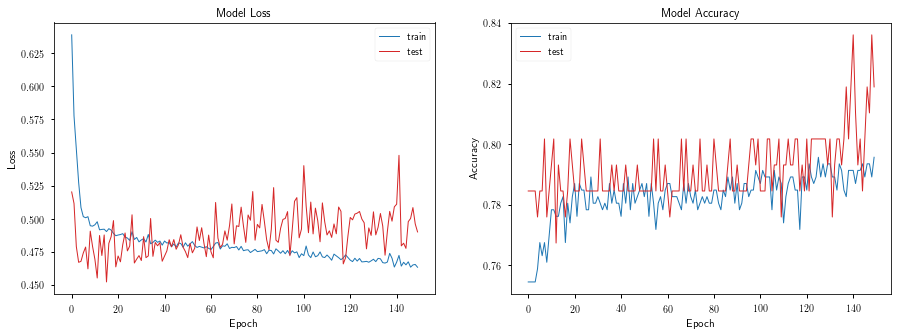

In [28]:
import matplotlib.pyplot as plt

plt.close()

fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

ax[0].plot(history.history['loss'], color=tab20[0], lw=1., label='train')
ax[0].plot(history.history['val_loss'], color=tab20[6], lw=1., label='test')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')

ax[1].plot(history.history['acc'], color=tab20[0], lw=1., label='train')
ax[1].plot(history.history['val_acc'], color=tab20[6], lw=1., label='test')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Model Accuracy')

### 2.1.2 Features with StandardScaling applied

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1245, 
                                                    shuffle=True
                                                   )
# scale variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=150, 
                    batch_size=10, 
                    verbose=False
                   )

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'Model Accuracy')

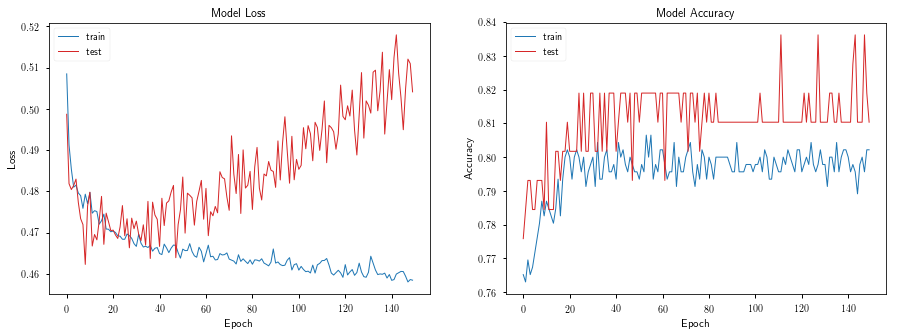

In [30]:
import matplotlib.pyplot as plt

plt.close()

fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

ax[0].plot(history.history['loss'], color=tab20[0], lw=1., label='train')
ax[0].plot(history.history['val_loss'], color=tab20[6], lw=1., label='test')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')

ax[1].plot(history.history['acc'], color=tab20[0], lw=1., label='train')
ax[1].plot(history.history['val_acc'], color=tab20[6], lw=1., label='test')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Model Accuracy')

# 2.2 Random Kernel Initializer

In [31]:
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(32, input_dim=3, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 2.2.1 Features Without Scaling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1245, 
                                                    shuffle=True
                                                   )

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=150, 
                    batch_size=10, 
                    verbose=False
                   )

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'Model Accuracy')

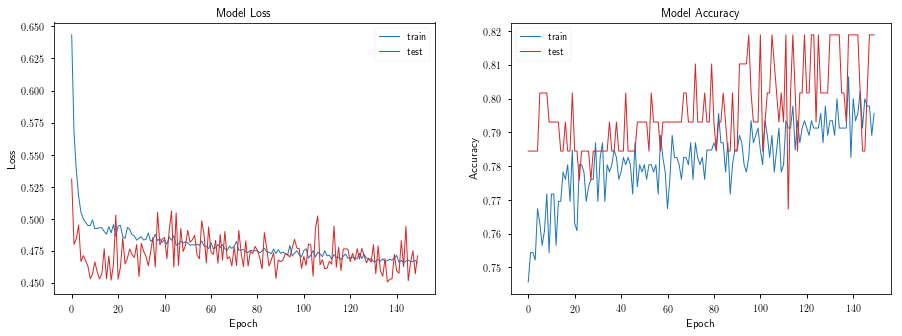

In [33]:
import matplotlib.pyplot as plt

plt.close()

fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

ax[0].plot(history.history['loss'], color=tab20[0], lw=1., label='train')
ax[0].plot(history.history['val_loss'], color=tab20[6], lw=1., label='test')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')

ax[1].plot(history.history['acc'], color=tab20[0], lw=1., label='train')
ax[1].plot(history.history['val_acc'], color=tab20[6], lw=1., label='test')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Model Accuracy')

### 2.1.2 Features with StandardScaling applied

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1245, 
                                                    shuffle=True
                                                   )
# scale variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=150, 
                    batch_size=10, 
                    verbose=False
                   )

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,1,'Model Accuracy')

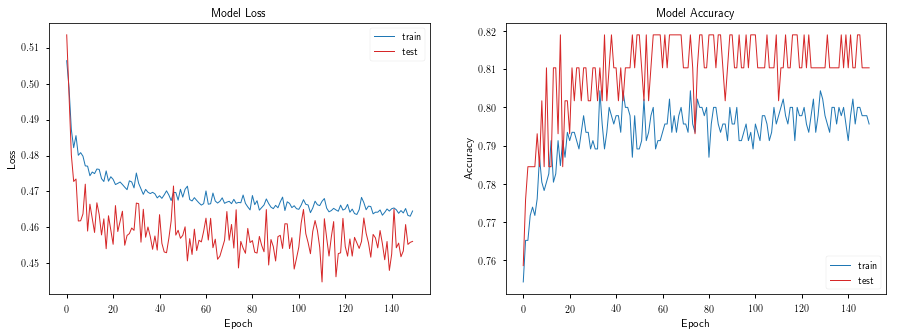

In [35]:
import matplotlib.pyplot as plt

plt.close()

fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

ax[0].plot(history.history['loss'], color=tab20[0], lw=1., label='train')
ax[0].plot(history.history['val_loss'], color=tab20[6], lw=1., label='test')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')

ax[1].plot(history.history['acc'], color=tab20[0], lw=1., label='train')
ax[1].plot(history.history['val_acc'], color=tab20[6], lw=1., label='test')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Model Accuracy')

# 3. Model Performance Evaluation (Iterative StratifiedKFold)
I chose StandardScaler with random_uniform weights

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import random

# -------------------
# model specification
# -------------------
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(32, input_dim=3, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# full pipelined model
clf = Pipeline([('feature', StandardScaler()), ('model', model)])

# -----------------------------------------------
# evaluate model performance for different sets
# -----------------------------------------------
iterations=2
loss_score = []
for i in range(0,iterations):
    # Split the data
    r_state = random.randint(1,1000000)
    skf = StratifiedKFold(n_splits=10, random_state=r_state, shuffle=True)
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf.fit(X_train, y_train, 
                model__epochs=20, 
                model__batch_size=10,
                model__verbose=False
               )
        
        loss_score.append(log_loss(y_test, clf.predict_proba(X_test)))

Text(0.5,0,'LogLoss Score')

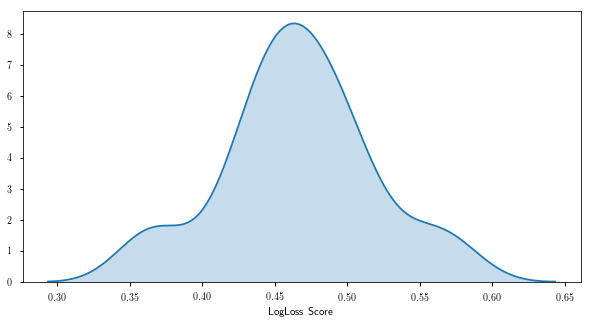

In [46]:
plt.close()

fig, ax = plt.subplots(figsize=(10,5))

sns.kdeplot(loss_score, shade=True, ax=ax)
ax.set_xlabel('LogLoss Score')